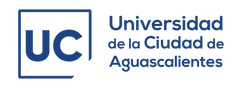

# **METODOS NUMERICOS II**

## Mitsiu Alejandro Carreño Sarabia - E23S-18014

### Distribuciones de frecuencia para variables cuantitativas

## Conociendo la base de datos

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("s03_titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Definiendo el número de clases con la **Regla de Sturges** , importar numpy

# $$k = 1 + \frac {10}{3}\log_{10}n$$

In [2]:
n = df.shape[0]

k = 1 + (1/3) + np.log10(n)
k = int(k.round(0))
k # Cantidad de grupos

4

#### Crear frecuencia tanto en valor numerico como en procentual % para la columna de Age

In [3]:
freq_age = pd.value_counts(
    pd.cut(
        x = df.Age,
        bins = k,
        include_lowest = True
    ),
    sort = False
)
freq_age

(0.339, 20.315]    207
(20.315, 40.21]    428
(40.21, 60.105]    187
(60.105, 80.0]      69
Name: Age, dtype: int64

In [4]:
percen_age = pd.value_counts(
    pd.cut(
        x = df.Age,
        bins = k,
        include_lowest = True
    ),
    sort = False,
    normalize = True
) * 100
percen_age

(0.339, 20.315]    23.232323
(20.315, 40.21]    48.035915
(40.21, 60.105]    20.987654
(60.105, 80.0]      7.744108
Name: Age, dtype: float64

#### Crear frecuencia tanto en valor numerico como en procentual % para la columna de Fare

In [5]:
freq_fare = pd.value_counts(
    pd.cut(
        x = df.Fare,
        bins = k,
        include_lowest = True
    ),
    sort = False
)
freq_fare

(-0.513, 128.082]     853
(128.082, 256.165]     29
(256.165, 384.247]      6
(384.247, 512.329]      3
Name: Fare, dtype: int64

In [6]:
percen_fare = pd.value_counts(
    pd.cut(
        x = df.Fare,
        bins = k,
        include_lowest = True
    ),
    sort = False,
    normalize = True
) * 100
percen_fare

(-0.513, 128.082]     95.735129
(128.082, 256.165]     3.254770
(256.165, 384.247]     0.673401
(384.247, 512.329]     0.336700
Name: Fare, dtype: float64

#### Agregar a un data frame la frecuencia y el % de la misma, de la columna de Age

In [7]:
age_data = pd.DataFrame({"Frec":freq_age, "Porcen": percen_age})
age_data

,Frec,Porcen
"(0.339, 20.315]",207,23.232323
"(20.315, 40.21]",428,48.035915
"(40.21, 60.105]",187,20.987654
"(60.105, 80.0]",69,7.744108


#### Agregar a un data frame la frecuencia y el % de la misma, de la columna de Fare

In [8]:
fare_data = pd.DataFrame({"Frec": freq_fare, "Percen": percen_fare})
fare_data

,Frec,Percen
"(-0.513, 128.082]",853,95.735129
"(128.082, 256.165]",29,3.254770
"(256.165, 384.247]",6,0.673401
"(384.247, 512.329]",3,0.336700


## Histogramas


Crear un gráfico de distribucion para la variable Age con las siguientes caracteristicas:


*   De tamaña de 14 x 8 inch
*   Colocar titulo principal con tamaño de letra 16
*   Colocar titulo al eje X
*   Colocar titulo al eje Y *ax.set_ylabel*





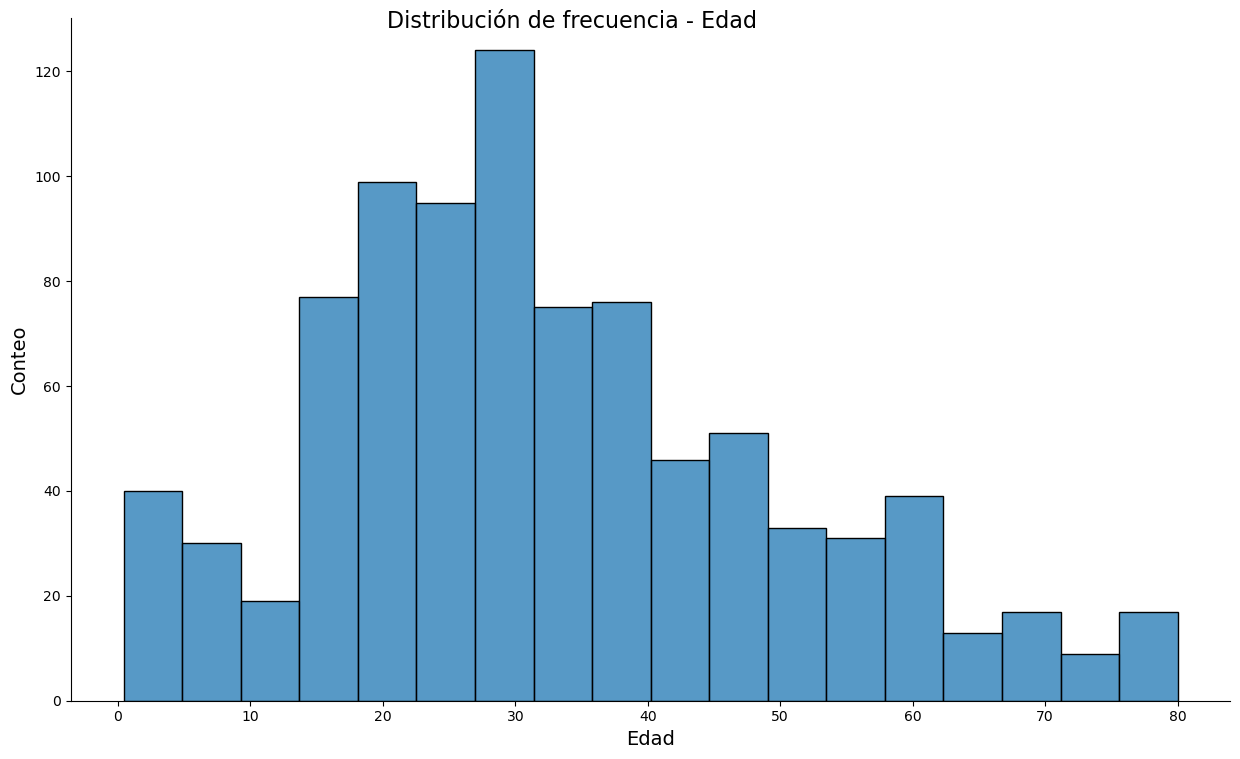

In [9]:
import seaborn as sns
ax = sns.displot(df.Age, kde=False)
ax.figure.set_size_inches(14,8)
ax.fig.suptitle("Distribución de frecuencia - Edad", fontsize=16)
ax.set_xlabels("Edad", fontsize=14)
ax.set_ylabels("Conteo", fontsize=14)

Crear un gráfico de barras para la variable **Age**, graficando en el eje Y el % de la frecuencia. Las caraccteristicas de la gráfica seran definidas por el alumno para la mejor visualización

Text(0, 0.5, 'Porcentaje %')

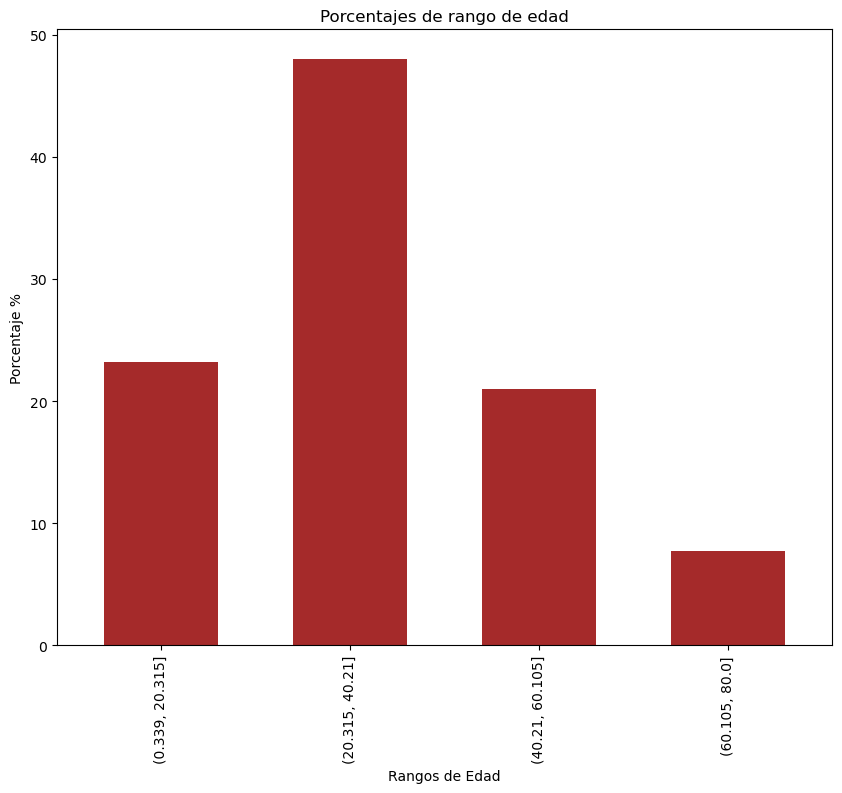

In [10]:
ax = percen_age.plot.bar(width=0.6, color="brown", figsize=(10,8), title="Porcentajes de rango de edad")
ax.set_xlabel("Rangos de Edad")
ax.set_ylabel("Porcentaje %")

Crear un gráfico de distribucion para la variable **Fare** con las siguientes caracteristicas:


*   De tamaña de 20 x 10 inch
*   Colocar titulo principal con tamaño de letra 18
*   Colocar titulo al eje X
*   Colocar titulo al eje Y *ax.set_ylabel*

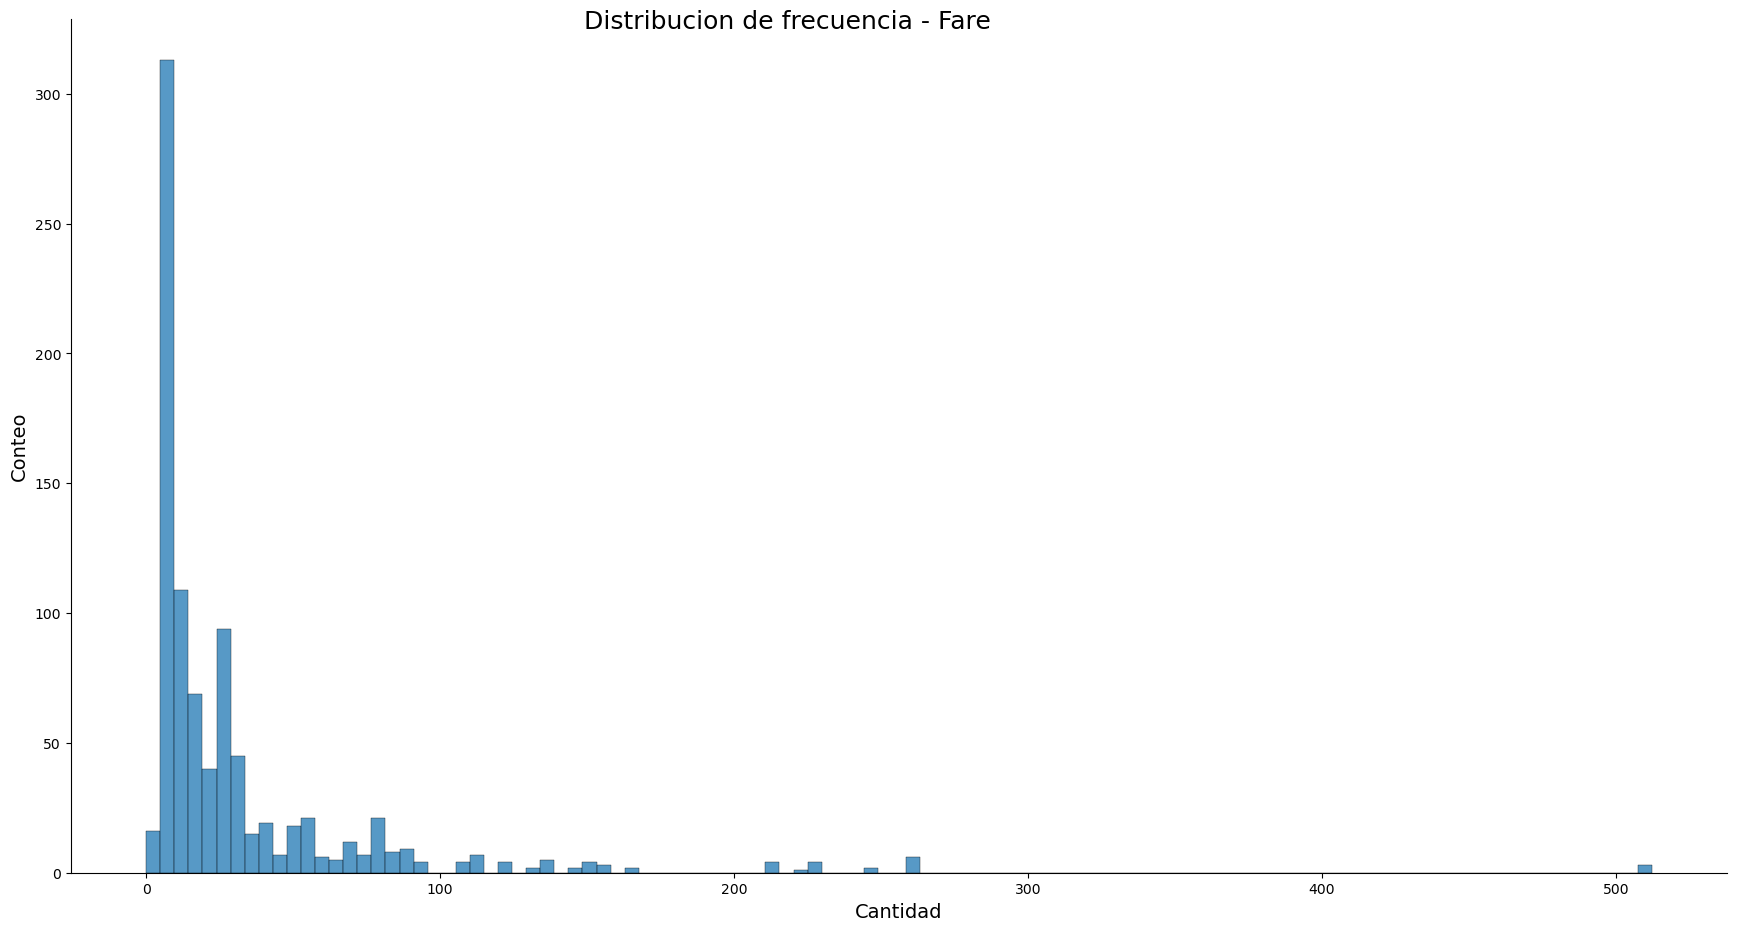

In [11]:
ax = sns.displot(df.Fare, kde=False)
ax.figure.set_size_inches(20, 10)
ax.fig.suptitle("Distribucion de frecuencia - Fare", fontsize=18)
ax.set_xlabels("Cantidad", fontsize=14)
ax.set_ylabels("Conteo", fontsize=14)

Crear un gráfico de barras para la variable **Fare**, graficando en el eje Y el % de la frecuencia. Las caraccteristicas de la gráfica seran definidas por el alumno para la mejor visualización

Text(0, 0.5, 'Porcentaje %')

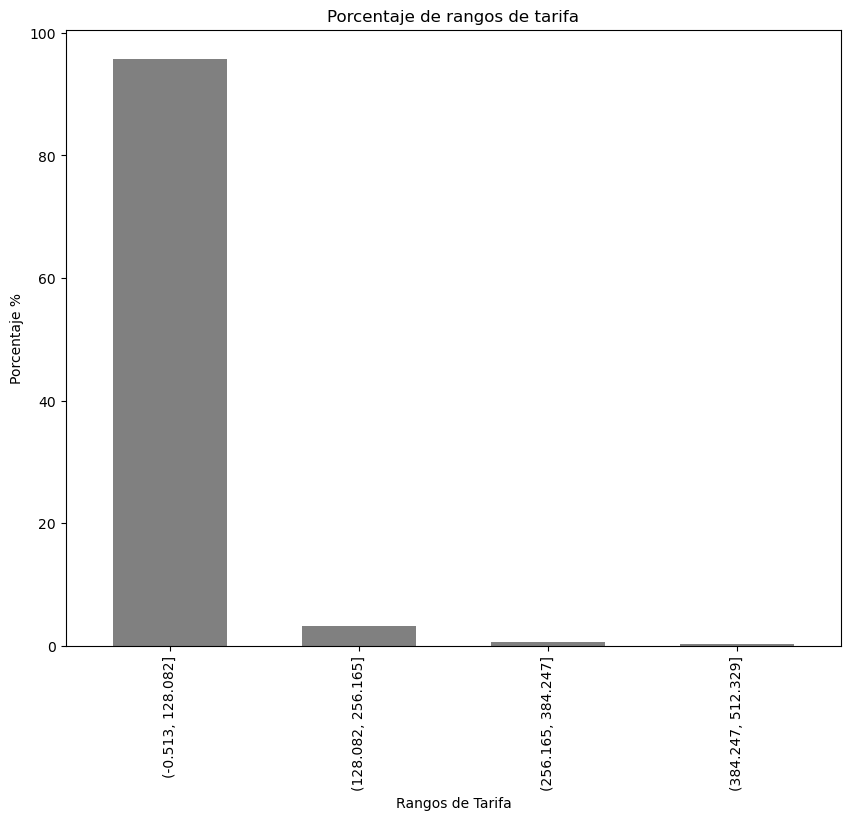

In [12]:
ax = percen_fare.plot.bar(width=0.6, color="gray", figsize=(10,8), title="Porcentaje de rangos de tarifa")
ax.set_xlabel("Rangos de Tarifa")
ax.set_ylabel("Porcentaje %")

Escribir conclusiones que encontraste en el desarrollo de este ejercicio:        
La gráfica más interesante a mi parecer es la de fares, me parece inusual que exista esta brecha tan grande entre el valor máximo (512) y el anterior a este (263) que tres registros tengan el mismo valor 512.3 le da un poco de legitimidad, pero no descartaría que el valor sea resultado de una variable desbordada durante la construcción del dataset.        
La variable de edad se comporta de una manera mucho más predecible, con una tendencia a campana de gauss, con su pico en gente joven, lo cuál se relaciona con que la mayoría de las tarifas es baja, la gente joven tiene menor poder adquisitivo.


**Subir tu archivo en en el apartado de Moodle**

# *#HappyCoding*